<a href="https://colab.research.google.com/github/plaban1981/NLP-with-Python/blob/master/Dphi_NLP_Applications_Predicting_E_Commerce_Product_Recommendation_Ratings_from_Reviews_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting E-Commerce Product Recommendation Ratings from Reviews 


![](https://github.com/dipanjanS/feature_engineering_session_dhs18/blob/master/ecommerce_product_ratings_prediction/clothing_banner.jpg?raw=1)

This is a classic NLP problem dealing with data from an e-commerce store focusing on women's clothing. Each record in the dataset is a customer review which consists of the review title, text description and a rating (ranging from 1 - 5) for a product amongst other features

We convert this into a binary classification problem such that a customer recommends a product (label 1) is the rating is > 3 else they do not recommend the product (label 0)

__Main Objective:__ Leverage the review text attributes to predict the recommendation rating (classification)


_Author: Dipanjan (DJ) Sarkar_

# Load up basic dependencies

In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix, classification_report

# Load and View the Dataset

The data is available at https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews from where you can download it.


We recommend using the kaggle API and the following command via CLI to get it.

__`kaggle datasets download -d nicapotato/womens-ecommerce-clothing-reviews`__

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/dipanjanS/feature_engineering_session_dhs18/master/ecommerce_product_ratings_prediction/Womens%20Clothing%20E-Commerce%20Reviews.csv', keep_default_na=False)
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


# Basic Data Processing

- Merge all review text attributes (title, text description) into one attribute
- Convert the 5-star rating system into a binary recommendation rating of 1 or 0

In [7]:
df['Review'] = (df['Title'].map(str) +' '+ df['Review Text']).apply(lambda row: row.strip())
df['Rating'] = [1 if rating > 3 else 0 for rating in df['Rating']]
df = df[['Review', 'Rating']]
df.head()

,Review,Rating
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,Some major design flaws I had such high hopes ...,0
3,"My favorite buy! I love, love, love this jumps...",1
4,Flattering shirt This shirt is very flattering...,1


In [10]:
df['Rating'].value_counts(dropna= False)

1    18208
0     5278
Name: Rating, dtype: int64

In [12]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

## Remove all records with no review text

In [4]:
df = df[df['Review'] != '']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22642 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  22642 non-null  object
 1   Rating  22642 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 530.7+ KB


## There is some imbalance in the data based on product ratings

In [ ]:
df['Rating'].value_counts()

1    17449
0     5193
Name: Rating, dtype: int64

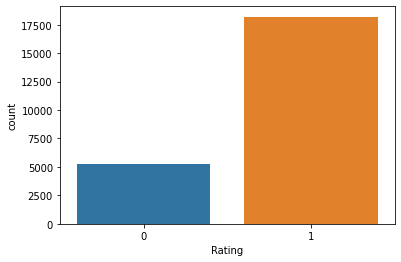

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x = 'Rating',data=df)
plt.show()

# Build train and test datasets

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Review']], df['Rating'], stratify= df['Rating'],random_state=42)
X_train.shape, X_test.shape

((17614, 1), (5872, 1))

In [19]:
from collections import Counter
Counter(y_train), Counter(y_test)

(Counter({0: 3958, 1: 13656}), Counter({0: 1320, 1: 4552}))

# Experiment 1: Basic NLP Count based Features

A number of basic text based features can also be created which sometimes are helpful for improving text classification models. 
Some examples are:

- __Word Count:__ total number of words in the documents
- __Character Count:__ total number of characters in the documents
- __Average Word Density:__ average length of the words used in the documents
- __Puncutation Count:__ total number of punctuation marks in the documents
- __Upper Case Count:__ total number of upper count words in the documents
- __Title Word Count:__ total number of proper case (title) words in the documents

Source: https://www.analyticsvidhya.com/blog/2018/04/a-comprehensive-guide-to-understand-and-implement-text-classification-in-python/

In [20]:
import string

X_train['char_count'] = X_train['Review'].apply(len)
X_train['word_count'] = X_train['Review'].apply(lambda x: len(x.split()))
X_train['word_density'] = X_train['char_count'] / (X_train['word_count']+1)
X_train['punctuation_count'] = X_train['Review'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
X_train['title_word_count'] = X_train['Review'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
X_train['upper_case_word_count'] = X_train['Review'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))


X_test['char_count'] = X_test['Review'].apply(len)
X_test['word_count'] = X_test['Review'].apply(lambda x: len(x.split()))
X_test['word_density'] = X_test['char_count'] / (X_test['word_count']+1)
X_test['punctuation_count'] = X_test['Review'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
X_test['title_word_count'] = X_test['Review'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
X_test['upper_case_word_count'] = X_test['Review'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [21]:
X_train.head()

,Review,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count
8448,Confortable I am usually a regular xs with ret...,193,37,5.078947,4,2,1
15545,Huge Agree with other poster. this shirt runs ...,148,30,4.774194,7,2,0
6559,Great leggings! These leggings are very comfor...,274,57,4.724138,5,2,0
10847,Outstanding! I noticed this dress in the highl...,513,96,5.288660,13,2,1
11970,Pretty but lots of fabric I grabbed this durin...,525,107,4.861111,15,2,1


In [22]:
X_test.head()

,Review,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count
22888,Large and boxy Good reason to read reviews. i ...,136,25,5.230769,3,2,0
20030,Eh. There's just nothing special about it. it ...,164,32,4.969697,7,1,0
3422,Wanted to like this... The craftmanship & mate...,523,99,5.230000,27,2,0
10987,"This dress is beautiful. it is tts, but since ...",324,61,5.225806,17,1,0
11024,They are tapered! why?! Waist is tight and thi...,141,26,5.222222,8,2,0


## Training a Logistic Regression Model 

A logistic regression model is easy to train, interpret and works well on a wide variety of NLP problems

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1, random_state=42, solver='liblinear')

## Model Evaluation Metrics - Quick Refresher

Just accuracy is never enough in datasets with a rare class problem.

- __Precision:__ The positive predictive power of a model. Out of all the predictions made by a model for a class, how many are actually correct
- __Recall:__ The coverage or hit-rate of a model. Out of all the test data samples belonging to a class, how many was the model able to predict (hit or cover) correctly.
- __F1-score:__ The harmonic mean of the precision and recall

Do check out ROC Curve, AUC Score and PR Curve also

In [24]:
lr.fit(X_train.drop(['Review'], axis=1), y_train)
predictions = lr.predict(X_test.drop(['Review'], axis=1))

print(classification_report(y_test, predictions))
pd.DataFrame(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1320
           1       0.78      1.00      0.87      4552

    accuracy                           0.78      5872
   macro avg       0.39      0.50      0.44      5872
weighted avg       0.60      0.78      0.68      5872



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1
0,0,1320
1,0,4552


Looks like our model was not able to predict a single product having a bad (no recommendation) rating, i.e. __Class 0__. 

This is as good as someone predicting a __1__ or __good__ for every product review. 

Can we do better?

# Leveraging Text Sentiment

Reviews are pretty subjective, opinionated and people often express stong emotions, feelings. 
This makes it a classic case where the text documents here are a good candidate for extracting sentiment as a feature.

The general expectation is that highly rated and recommended products (__label 1__) should have a __positive__ sentiment and products which are not recommended (__label 0__) should have a __negative__ sentiment.

TextBlob is an excellent open-source library for performing NLP tasks with ease, including sentiment analysis. It also an a sentiment lexicon (in the form of an XML file) which it leverages to give both polarity and subjectivity scores. 

- The polarity score is a float within the range [-1.0, 1.0]. 
- The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective. 

Perhaps this could be used for getting some new features? Let's look at some basic examples.

Source: https://towardsdatascience.com/a-practitioners-guide-to-natural-language-processing-part-i-processing-understanding-text-9f4abfd13e72

In [25]:
import textblob

textblob.TextBlob('This is an AMAZING pair of Jeans!').sentiment

Sentiment(polarity=0.7500000000000001, subjectivity=0.9)

In [26]:
textblob.TextBlob('I really hated this UGLY T-shirt!!').sentiment

Sentiment(polarity=-0.95, subjectivity=0.85)

Looks like this should help us get features which can distinguish between good and bad products. Let's try it out on our dataset!

# Experiment 2: Features from Sentiment Analysis 

Remember this is unsupervised, lexicon-based sentiment analysis where we don't have any pre-labeled data saying which review migth have a positive or negative sentiment. We use the lexicon to determine this.

In [27]:
x_train_snt_obj = X_train['Review'].apply(lambda row: textblob.TextBlob(row).sentiment)
X_train['Polarity'] = [obj.polarity for obj in x_train_snt_obj.values]
X_train['Subjectivity'] = [obj.subjectivity for obj in x_train_snt_obj.values]

x_test_snt_obj = X_test['Review'].apply(lambda row: textblob.TextBlob(row).sentiment)
X_test['Polarity'] = [obj.polarity for obj in x_test_snt_obj.values]
X_test['Subjectivity'] = [obj.subjectivity for obj in x_test_snt_obj.values]

In [28]:
X_train.head()

,Review,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,Polarity,Subjectivity
8448,Confortable I am usually a regular xs with ret...,193,37,5.078947,4,2,1,0.433333,0.556227
15545,Huge Agree with other poster. this shirt runs ...,148,30,4.774194,7,2,0,0.091667,0.468333
6559,Great leggings! These leggings are very comfor...,274,57,4.724138,5,2,0,0.434000,0.600000
10847,Outstanding! I noticed this dress in the highl...,513,96,5.288660,13,2,1,0.197917,0.441827
11970,Pretty but lots of fabric I grabbed this durin...,525,107,4.861111,15,2,1,0.227409,0.492914


## Model Training and Evaluation

In [29]:
lr.fit(X_train.drop(['Review'], axis=1), y_train, )
predictions = lr.predict(X_test.drop(['Review'], axis=1))

print(classification_report(y_test, predictions))
pd.DataFrame(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.24      0.36      1320
           1       0.82      0.97      0.88      4552

    accuracy                           0.80      5872
   macro avg       0.75      0.61      0.62      5872
weighted avg       0.78      0.80      0.77      5872



,0,1
0,323,997
1,154,4398


Interesting! Looks like we are now able to predict __27%__ of the total number of bad or negative rated products now! 
Precision is quite good at __69%__

__F1-Score__ for bad reviews is now __40%__ and good reviews is __89%__

This brings our overall __F1-Score__ to __77%__ which is quite good.

Can we still improve on our model since the recall of bad reviews is still pretty low?

# Text Pre-processing and Wrangling

We want to extract some specific features based on standard NLP feature engineering models like the classic Bag of Words model.
For this we need to clean and pre-process our text data. We will build a simple text pre-processor here since the main intent is to look at feature engineering strategies.

We will focus on:
- Text Lowercasing
- Removal of contractions
- Removing unnecessary characters, numbers and symbols
- Stemming
- Stopword removal

Source: https://towardsdatascience.com/a-practitioners-guide-to-natural-language-processing-part-i-processing-understanding-text-9f4abfd13e72

In [30]:
!pip install contractions
!pip install textsearch
!pip install tqdm
import nltk
nltk.download('punkt')
nltk.download('stopwords')

     |████████████████████████████████| 321 kB 4.9 MB/s 
     |████████████████████████████████| 284 kB 44.8 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85447 sha256=d11746f6f56b1c76cb51ce2542114ec080160cf0c0e88eda8b8d3405ce9af83e
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
import contractions

contractions.fix('I didn\'t like this t-shirt')

'I did not like this t-shirt'

In [32]:
import nltk
import contractions
import re

# remove some stopwords to capture negation in n-grams if possible
stop_words = nltk.corpus.stopwords.words('english')
stop_words.remove('no')
stop_words.remove('not')
stop_words.remove('but')

# load up a simple porter stemmer - nothing fancy
ps = nltk.porter.PorterStemmer()

def simple_text_preprocessor(document): 
    # lower case
    document = str(document).lower()
    
    # expand contractions
    document = contractions.fix(document)
    
    # remove unnecessary characters
    document = re.sub(r'[^a-zA-Z]',r' ', document)
    document = re.sub(r'nbsp', r'', document)
    document = re.sub(' +', ' ', document)
    
    # simple porter stemming
    document = ' '.join([ps.stem(word) for word in document.split()])
    
    # stopwords removal
    document = ' '.join([word for word in document.split() if word not in stop_words])
    
    return document

stp = np.vectorize(simple_text_preprocessor)

In [33]:
X_train['Clean Review'] = stp(X_train['Review'].values)
X_test['Clean Review'] = stp(X_test['Review'].values)

X_train.head()

,Review,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,Polarity,Subjectivity,Clean Review
8448,Confortable I am usually a regular xs with ret...,193,37,5.078947,4,2,1,0.433333,0.556227,confort usual regular xs retail top took chanc...
15545,Huge Agree with other poster. this shirt runs ...,148,30,4.774194,7,2,0,0.091667,0.468333,huge agre poster thi shirt run veri big I flow...
6559,Great leggings! These leggings are very comfor...,274,57,4.724138,5,2,0,0.434000,0.600000,great leg leg veri comfort bit control order f...
10847,Outstanding! I noticed this dress in the highl...,513,96,5.288660,13,2,1,0.197917,0.441827,outstand notic thi dress highlight area read r...
11970,Pretty but lots of fabric I grabbed this durin...,525,107,4.861111,15,2,1,0.227409,0.492914,pretti but lot fabric grab thi dure sale state...


## Extracting out the structured features from previous experiments

In [34]:
X_train_metadata = X_train.drop(['Review', 'Clean Review'], axis=1).reset_index(drop=True)
X_test_metadata = X_test.drop(['Review', 'Clean Review'], axis=1).reset_index(drop=True)

X_train_metadata.head()

,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,Polarity,Subjectivity
0,193,37,5.078947,4,2,1,0.433333,0.556227
1,148,30,4.774194,7,2,0,0.091667,0.468333
2,274,57,4.724138,5,2,0,0.434000,0.600000
3,513,96,5.288660,13,2,1,0.197917,0.441827
4,525,107,4.861111,15,2,1,0.227409,0.492914


# Experiment 3: Adding Bag of Words based Features - 1-grams

This is perhaps the most simple vector space representational model for unstructured text. A vector space model is simply a mathematical model to represent unstructured text (or any other data) as numeric vectors, such that each dimension of the vector is a specific feature\attribute. 

The bag of words model represents each text document as a numeric vector where each dimension is a specific word from the corpus and the value could be its frequency in the document, occurrence (denoted by 1 or 0) or even weighted values. 

The model’s name is such because each document is represented literally as a ‘bag’ of its own words, disregarding word orders, sequences and grammar.

Source: https://towardsdatascience.com/understanding-feature-engineering-part-3-traditional-methods-for-text-data-f6f7d70acd41

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1, 1))
X_traincv = cv.fit_transform(X_train['Clean Review']).toarray()
X_traincv = pd.DataFrame(X_traincv, columns=cv.get_feature_names())

X_testcv = cv.transform(X_test['Clean Review']).toarray()
X_testcv = pd.DataFrame(X_testcv, columns=cv.get_feature_names())
X_traincv.head()

,aa,aaaaaaamaz,aaaaandidon,aaaah,aaaahmaz,aaah,aam,ab,abbey,abbi,abck,abdomen,abdomin,abercrombi,abhor,abil,abject,abl,abnorm,abo,abolut,abou,abov,abroad,abruptli,absenc,abso,absolut,absoluti,absolutley,absolutli,absorb,abstract,absurd,abt,abund,abut,ac,acacia,accent,...,yogi,yogini,yoke,yolk,yore,york,yoself,young,younger,youth,youthful,yr,yuck,yucki,yum,yumi,yummi,yummiest,yup,zag,zara,zed,zermatt,zero,zig,zigzag,zillion,zing,zip,zipepr,ziploc,zipper,zipperi,zippi,zoe,zone,zooland,zoom,zowi,zuma
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
X_train_comb = pd.concat([X_train_metadata, X_traincv], axis=1)
X_test_comb = pd.concat([X_test_metadata, X_testcv], axis=1)

X_train_comb.head()

,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,Polarity,Subjectivity,aa,aaaaaaamaz,aaaaandidon,aaaah,aaaahmaz,aaah,aam,ab,abbey,abbi,abck,abdomen,abdomin,abercrombi,abhor,abil,abject,abl,abnorm,abo,abolut,abou,abov,abroad,abruptli,absenc,abso,absolut,absoluti,absolutley,absolutli,absorb,...,yogi,yogini,yoke,yolk,yore,york,yoself,young,younger,youth,youthful,yr,yuck,yucki,yum,yumi,yummi,yummiest,yup,zag,zara,zed,zermatt,zero,zig,zigzag,zillion,zing,zip,zipepr,ziploc,zipper,zipperi,zippi,zoe,zone,zooland,zoom,zowi,zuma
0,193,37,5.078947,4,2,1,0.433333,0.556227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,148,30,4.774194,7,2,0,0.091667,0.468333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,274,57,4.724138,5,2,0,0.434000,0.600000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,513,96,5.288660,13,2,1,0.197917,0.441827,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,525,107,4.861111,15,2,1,0.227409,0.492914,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Model Training and Evaluation

In [37]:
lr.fit(X_train_comb, y_train)
predictions = lr.predict(X_test_comb)

print(classification_report(y_test, predictions))
pd.DataFrame(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72      1320
           1       0.91      0.95      0.93      4552

    accuracy                           0.88      5872
   macro avg       0.84      0.81      0.82      5872
weighted avg       0.88      0.88      0.88      5872



,0,1
0,882,438
1,249,4303


Wow! This looks promising.

We are now able to predict __70%__ of the total number of bad or negative rated products now! 
Precision is quite good at __76%__

__F1-Score__ for bad reviews is now __73%__ and good reviews is __92%__

This brings our overall __F1-Score__ to __88%__ which is quite good.